<a href="https://colab.research.google.com/github/ParveenDavid2394/Tensorflow/blob/master/Computer_Vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# load datasets

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# normalize pixel values in our train_images and test_images to be between 0 and 1

train_images, test_images = train_images / 255.0 , test_images / 255.0

# class names
class_names = ['airplane','automobile','bird','cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


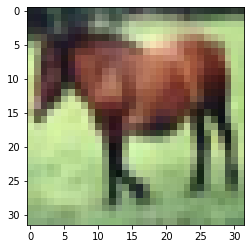

In [7]:
plt.figure()
plt.imshow(train_images[7])
plt.grid(False)
plt.show()

In [8]:
# define our model architecture

model = models.Sequential()

model.add(layers.Conv2D(32,(2,2),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 55,840
Trainable params: 55,840
Non-trainable params: 0
_________________________________________________________________


In [10]:
# adding dense layer to model
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 32)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [13]:
# train and compile the model

model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.5180 - accuracy: 0.4526 - val_loss: 1.2083 - val_accuracy: 0.5671
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.1473 - accuracy: 0.5919 - val_loss: 1.0596 - val_accuracy: 0.6230
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9958 - accuracy: 0.6511 - val_loss: 1.0277 - val_accuracy: 0.6404
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9081 - accuracy: 0.6795 - val_loss: 0.9471 - val_accuracy: 0.6644
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8342 - accuracy: 0.7071 - val_loss: 0.9431 - val_accuracy: 0.6675
Epoch 6/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7804 - accuracy: 0.7256 - val_loss: 0.8662 - val_accuracy: 0.7031
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7326 - accuracy: 0.7427 - val_loss: 0.9003 -

In [14]:
# Evaluating our model

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8529 - accuracy: 0.7177
0.7177000045776367


## Working with Small Datasets

  - technique to train CNN models when we dont have access to millions of image samples

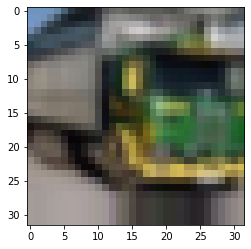

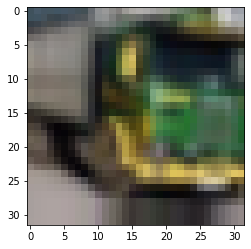

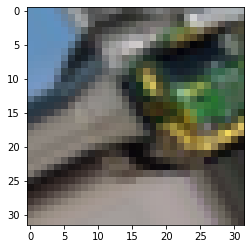

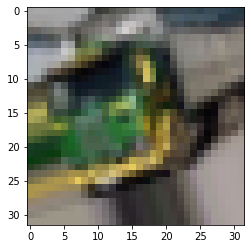

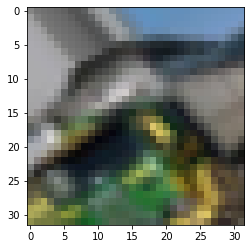

In [15]:
"""
 Data Augmentation
    - simply performing random transformations on our images
    - Transformations such as compressions, rotations, stretches and color changes
    - made easy with keras
"""

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# pick an image to tranform
test_img = train_images[14]
img = image.img_to_array(test_img) # convert image to numpy array
img = img.reshape((1,) + img.shape) # reshape image

i = 0

# infinite loop
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()


## Using Pretrained Models and Fine Tuning

There are few pretrained models available. IF we can implement them as our base and then add layers to match our requirements, and with fine tuning we can improve our accuracy. 

Idea: Use a pretrained CNN that has been trained with millions of images and seen vast variety of features as our base to identify features.

Advantage: Can achieve high accuracy even with small datasets

Fine Tuning: adjusting the last few layers to accomodate our requirements. 

In [17]:
# Using a pretrained model
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

keras = tf.keras

In [18]:
# use cats vs dogs datasets
# load dataset from tensorflow

import tensorflow_datasets as tfds

# split the data into 80% training, 10% validation and 10% testing
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]','train[80%:90%]','train[90%:]'],
    with_info = True,
    as_supervised = True,
)

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteIKCLNL/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


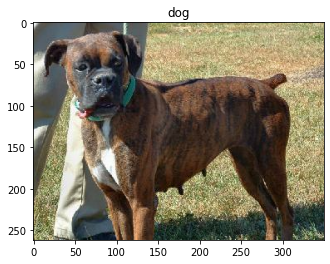

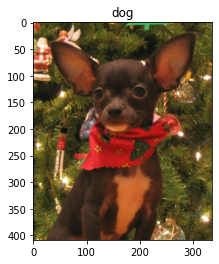

In [19]:
# function to get image labels
get_label_name = metadata.features['label'].int2str

for image,label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


In [21]:
# each image has different dimensions, so need to normalize all image to have same dimensions

IMG_SIZE = 160

# def a function that returns image with size 160 x 160
def format_example(image,label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) -1
  image = tf.image.resize(image, (IMG_SIZE,IMG_SIZE))

  return image, label


In [ ]:
# apply function
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

# view resized image
for image, label in train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


Finally we will shuffle and batch the images.

In [38]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

## Using a Pretrained Model

Using MobileNet V2 from Google. Trained with 1.4 million images and 1000 different classes

*Important*: Need to specify that only using the base layers not the top

In [29]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# create base model from MobileNet V2
base_model = tf.keras.applications.MobileNetV2(
    input_shape = IMG_SHAPE,
    include_top=False,
    weights = 'imagenet')


In [30]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

## Freezing the base.

Disabling the training property of a layer. Means there wont be any changes done to the weights of any layers that are frozen.

In [32]:
base_model.trainable = False

base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [33]:
# add global classifier

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(1)

In [34]:
# combine all layers into a model
model = tf.keras.Sequential([
                             base_model,
                             global_average_layer,
                             prediction_layer
])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [36]:
# compile the model

base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
# check initial accuracy before training the model with images

initial_epochs = 3
validation_steps = 20

loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)


20/20 [==============================] - 11s 555ms/step - loss: 0.7494 - accuracy: 0.5078


In [40]:
# train the model

history = model.fit(
    train_batches,
    epochs=initial_epochs,
    validation_data=validation_batches
)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 377s 648ms/step - loss: 0.2177 - accuracy: 0.9061 - val_loss: 0.0918 - val_accuracy: 0.9673
Epoch 2/3
582/582 [==============================] - 381s 655ms/step - loss: 0.0751 - accuracy: 0.9726 - val_loss: 0.0670 - val_accuracy: 0.9729
Epoch 3/3
582/582 [==============================] - 382s 657ms/step - loss: 0.0598 - accuracy: 0.9774 - val_loss: 0.0585 - val_accuracy: 0.9772
[0.9060720205307007, 0.972649097442627, 0.9774314761161804]


In [41]:
# instead of training the model each time
# option to save and load the model back using keras format

model.save('cats_vs_dogs.h5') # h5 is keras format

# then can load it back

new_model = tf.keras.models.load_model('cats_vs_dogs.h5')